## Objetivo de la Actividad: 
Esta actividad te sumerge en el mundo del clustering, una técnica fundamental en la minería de datos para descubrir 
estructuras y patrones en grandes conjuntos de datos. Aplicarás tres técnicas de clustering - K-Means, Redes Neuronales SOM (Self-Organizing Maps) y DBScan - para comprender sus diferencias, ventajas y aplicaciones prácticas
Utilizando un conjunto de datos de tu elección, explorarás cómo estas 
técnicas pueden revelar agrupaciones naturales y ofrecer insights valiosos

<b>Instrucciones:</b>
<b>1. Investigación y Selección de un Conjunto de Datos:</b>
- Investiga las características, ventajas y limitaciones de K￾Means, Redes Neuronales SOM y DBScan utilizando ChatGPT 
o Google Gemini.
- Selecciona un conjunto de datos apropiado para aplicar técnicas 
de clustering. Este puede ser el conjunto de datos Iris, que es 
ampliamente utilizado para este tipo de tareas, o cualquier otro 
conjunto de datos que consideres interesante y desafiante.

<b>2. Preparación de Datos:</b>
- Realiza una limpieza y preparación inicial de tu conjunto de 
datos seleccionado, asegurando que esté listo para el análisis de 
clustering.

<b>3. Aplicación de Técnicas de Clustering:</b>
- Aplica cada una de las tres técnicas de clustering al conjunto de 
datos elegido:
 
- K-Means: Experimenta con diferentes valores de K para 
encontrar la cantidad óptima de clusters.
- Redes Neuronales SOM: Utiliza SOM para visualizar 
los datos y encontrar agrupaciones basadas en similitudes 
topológicas.
- DBScan: Experimenta con diferentes valores de epsilon 
y min_samples para observar cómo varían los clusters 
formados.
- Para cada técnica, documenta el proceso y el código utilizado.

<b>4. Visualización y Análisis de Resultados:</b>
- Visualiza los resultados de cada técnica de clustering. Puedes 
usar gráficos de dispersión para K-Means y DBScan, y mapas 
de calor o gráficos 2D para SOM.
- Analiza y compara los resultados obtenidos con cada técnica. 
Reflexiona sobre cómo cada método agrupa los datos y los 
insights que se pueden obtener de cada agrupación

### <font color='yellow'>1. K-Means Clustering </font>
<b>Pasos:</b>
1. Entendimiento del Problema:
Seleccionar el número optimal de clusters (k) es crucial para K-Means.
2. Preprocesamiento:
Escalar los datos en la distancia de clustering.
3. Iniciar Centroides:
Seleccionar k puntos aleatorios en el dataset como los primeros centroides.
4. Asignación de Puntos a Clusters:
Asignar cada punto al centroid más cercano.
5. Actualizar Centroides:
Calcular el nuevo centroid de cada cluster como el punto medio de todos los puntos asignados a ese cluster.
6. Iteración:
Repetir los pasos de asignación y actualización de centroides hasta que los centroides no cambien significativamente o se alcance un número máximo de iteraciones.
7. Visualización:
Representar los clusters en un plot de dispersión para evaluar la calidad de los clusters.

<b>Herramientas Utilizadas:</b>
- Scikit-learn para implementar K-Means.
- Matplotlib para visualización.

In [8]:
!pip install -U scikit-learn

C:\Users\Ever\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


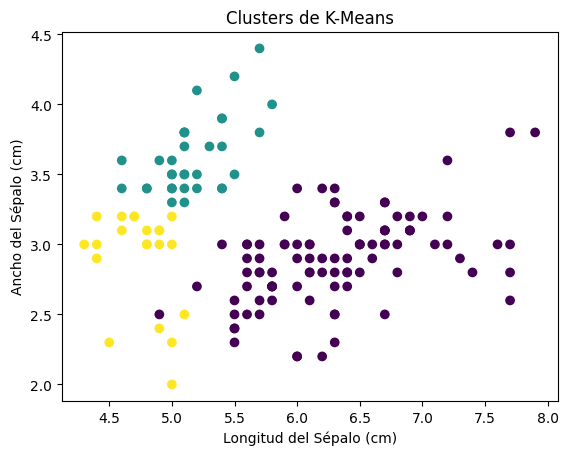

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pandas as pd

# Cargar el dataset Iris
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Normalización
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualizar los resultados
# Asegúrate de seleccionar las columnas correctas para 'x' e 'y'
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=data['Cluster'], cmap='viridis')
plt.title('Clusters de K-Means')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Ancho del Sépalo (cm)')
plt.show()


### <font color='yellow'>2. Self-Organizing Maps (SOM)</font>
<b/>Pasos:</b>
1. Inicialización:
Crear una grilla de neuronas artificiales (mapa) con pesos iniciales aleatorios.
2. Selección de un Neurona Ganador:
En cada iteración, encontrar el neurona cuyos pesos son más similares a los datos de entrada (neurona ganador).
3. Actualización de Pesos:
Actualizar los pesos del neurona ganador y de sus neuronas vecinas en el mapa para que se asemejen más a los datos de entrada.
4. Iteración:
Repetir el proceso de selección y actualización durante un número fijo de iteraciones o hasta que los cambios en los pesos sean mínimos.
5. Visualización del Mapa:
Utilizar un plot para visualizar el mapa de SOM y ver cómo se distribuyen los datos en el mapa.
6. Clustering:
Asignar los datos de entrada al cluster representado por el neurona ganador.

<b>Herramientas Utilizadas:</b>
- Minisom para implementar SOM.
- Matplotlib para visualización.

In [6]:
!pip install minisom pandas

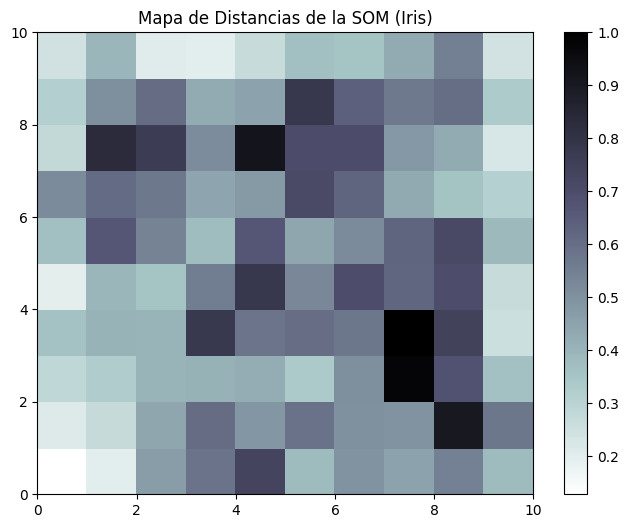

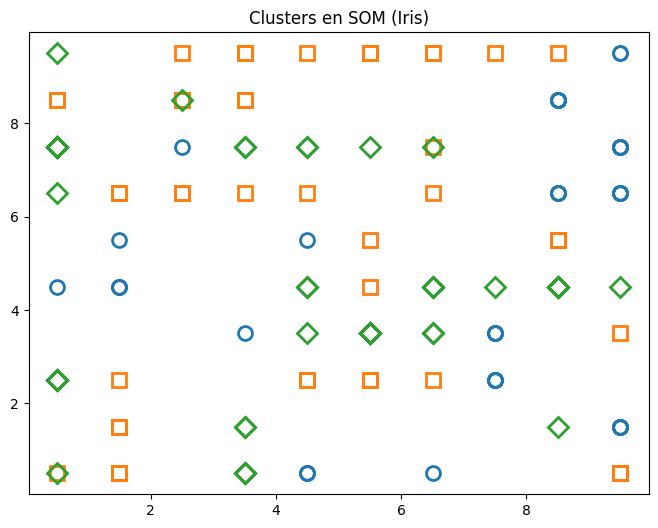

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom

# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Normalización de los datos
X_scaled = StandardScaler().fit_transform(X)

# Convertir las especies en códigos numéricos explícitamente
df = pd.DataFrame(X_scaled, columns=feature_names)
df['species_code'] = y  # Asigna directamente los códigos numéricos de las especies

# Entrenar una SOM
som_shape = (10, 10)  # Tamaño del mapa SOM
som = MiniSom(som_shape[0], som_shape[1], len(feature_names), sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, num_iteration=100)  # Entrenar SOM con 100 iteraciones

# Mapa de distancias de SOM
plt.figure(figsize=(8, 6))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()
plt.title('Mapa de Distancias de la SOM (Iris)')
plt.show()

# Visualización de clusters en SOM
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']

plt.figure(figsize=(8, 6))
for cnt, xx in enumerate(X_scaled):
    w = som.winner(xx)  # Neurona ganadora
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[(int(df['species_code'].iloc[cnt]))],
             markerfacecolor='None', markeredgecolor=colors[(int(df['species_code'].iloc[cnt]))],
             markersize=10, markeredgewidth=2)

plt.title('Clusters en SOM (Iris)')
plt.show()

### <font color='yellow'>3. DBSCAN Clustering</font>
<b>Pasos:</b>
1. Selección de Parámetros:
Elegir eps (el radio dentro del cual se consideran puntos como vecinos) y min_samples (el número mínimo de puntos necesarios para formar un cluster).
2. Expansión de Clusters:
Encontrar todos los puntos密度达到min_samples dentro de eps de un punto para formar un cluster.
3. Asignación de Ruido:
Asignar puntos que no son parte de ningún cluster como ruido.
4. Iteración:
Repetir el proceso de expansión y asignación para todos los puntos en el dataset.
5. Visualización:
Utilizar un plot de dispersión para visualizar los clusters y el ruido.

<b>Herramientas Utilizadas:</b>
- Scikit-learn para implementar DBSCAN.
- Matplotlib y Seaborn para visualización.

In [4]:
!pip install seaborn

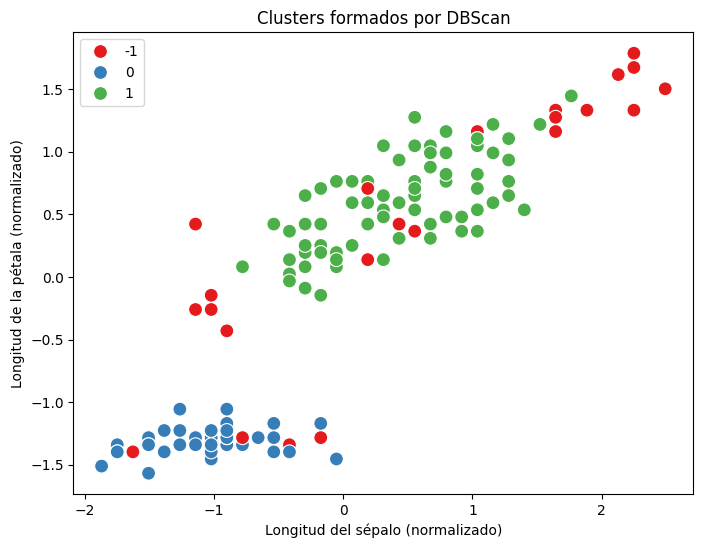

In [7]:
# Importar DBScan
from sklearn.cluster import DBSCAN
import seaborn as sns

# Aplicar DBScan
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Visualización de los clusters formados por DBScan
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 2], hue=labels_dbscan, palette="Set1", s=100)
plt.title('Clusters formados por DBScan')
plt.xlabel('Longitud del sépalo (normalizado)')
plt.ylabel('Longitud de la pétala (normalizado)')
plt.legend()
plt.show()